In [1]:
import pandas as pd

# Load the provided dataset
file_path = "/content/fashion_sustainability_cleaned_final.csv"
df = pd.read_csv(file_path)

# Display basic info and the first few rows
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5013 entries, 0 to 5012
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Brand_Name                  5013 non-null   object 
 1   Country                     5013 non-null   object 
 2   Year                        5013 non-null   int64  
 3   Sustainability_Rating       5013 non-null   object 
 4   Material_Type               5013 non-null   object 
 5   Eco_Friendly_Manufacturing  5013 non-null   object 
 6   Carbon_Footprint_MT         5013 non-null   float64
 7   Water_Usage_Liters          5013 non-null   float64
 8   Waste_Production_KG         5013 non-null   float64
 9   Recycling_Programs          5013 non-null   object 
 10  Product_Lines               5013 non-null   int64  
 11  Average_Price_USD           5013 non-null   float64
 12  Market_Trend                5013 non-null   object 
 13  Certifications              5013 

In [2]:
# Map the binary target to 1 and 0
df['Recycling_Programs'] = df['Recycling_Programs'].map({'Yes': 1, 'No': 0})

# Drop non-informative columns (e.g., Brand_Name)
df_model = df.drop(columns=["Brand_Name"])

# Define target (y) and features (X)
target = "Recycling_Programs"
X = df_model.drop(target, axis=1)
y = df_model[target]

# Display the target value counts to verify the binary split
print("Target distribution for Recycling Programs:")
print(y.value_counts())


Target distribution for Recycling Programs:
Recycling_Programs
1    2532
0    2481
Name: count, dtype: int64


In [16]:
df_model

,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
0,Brazil,2015,C,Hemp,Yes,85.13,1308839.48,60047.04,1,5,328.81,Growing,Fair Trade
1,Japan,2023,B,Vegan Leather,No,358.73,1568552.21,78799.16,0,5,240.02,Growing,B Corp
2,Brazil,2014,B,Bamboo Fabric,Yes,330.49,4791168.72,77917.88,1,7,161.91,Declining,B Corp
3,Brazil,2016,D,Recycled Polyester,Yes,277.11,3023687.50,10916.38,1,3,375.71,Declining,GOTS
4,Germany,2016,D,Organic Cotton,Yes,405.52,3579678.54,15449.83,1,20,112.55,Growing,B Corp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5008,UK,2015,B,Bamboo Fabric,Yes,368.82,2341534.97,85843.82,1,10,416.43,Growing,B Corp
5009,India,2011,D,Bamboo Fabric,No,190.23,4666341.85,88242.58,0,17,250.32,Stable,Fair Trade
5010,Japan,2012,B,Vegan Leather,Yes,251.42,4335723.24,83691.52,1,7,272.76,Declining,OEKO-TEX
5011,Brazil,2019,B,Tencel,Yes,182.42,3464574.79,3338.42,1,10,305.61,Stable,GOTS


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify numeric and categorical features
numeric_features = ['Year', 'Carbon_Footprint_MT', 'Water_Usage_Liters',
                    'Waste_Production_KG', 'Product_Lines', 'Average_Price_USD']
categorical_features = ['Country', 'Sustainability_Rating', 'Material_Type',
                        'Eco_Friendly_Manufacturing', 'Market_Trend', 'Certifications']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a ColumnTransformer for preprocessing:
# - Scale numeric features with StandardScaler.
# - One-hot encode categorical features.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


In [4]:
X_train

,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Product_Lines,Average_Price_USD,Market_Trend,Certifications
3245,China,2021,B,Hemp,Yes,473.62,3858119.33,45348.93,6,284.08,Declining,Fair Trade
2018,China,2023,D,Tencel,No,363.07,4777717.49,81925.73,2,157.66,Growing,GOTS
1672,USA,2013,A,Bamboo Fabric,No,427.57,1424802.54,13580.83,10,330.75,Stable,OEKO-TEX
3667,France,2011,B,Vegan Leather,Yes,442.79,3668414.09,94340.78,6,244.77,Growing,Fair Trade
831,Japan,2024,D,Hemp,No,421.24,1011418.79,74594.12,12,460.67,Growing,GOTS
...,...,...,...,...,...,...,...,...,...,...,...,...
4426,Japan,2010,A,Hemp,Yes,177.23,1243608.00,43481.57,17,136.58,Declining,GOTS
466,USA,2011,C,Recycled Polyester,Yes,481.22,2495943.65,26644.95,13,395.17,Stable,B Corp
3092,Germany,2018,D,Bamboo Fabric,No,44.10,1373733.19,50719.80,20,114.44,Growing,GOTS
3772,India,2022,A,Vegan Leather,Yes,482.29,2225894.86,28317.93,4,27.05,Stable,B Corp


In [5]:
X_test

,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Product_Lines,Average_Price_USD,Market_Trend,Certifications
4872,UK,2018,B,Organic Cotton,Yes,164.49,3095324.88,40984.12,9,439.50,Growing,OEKO-TEX
1025,India,2011,B,Recycled Polyester,No,481.39,4906438.37,27322.55,5,135.05,Declining,Fair Trade
3192,Japan,2023,C,Organic Cotton,Yes,235.57,3925874.48,69606.67,18,281.82,Declining,GOTS
2894,UK,2014,C,Vegan Leather,No,81.63,286898.01,72927.63,18,431.78,Stable,Cradle to Cradle
4392,India,2018,C,Hemp,No,452.37,2319609.90,77129.15,12,317.12,Growing,Fair Trade
...,...,...,...,...,...,...,...,...,...,...,...,...
88,India,2024,A,Bamboo Fabric,Yes,361.48,4429759.87,99020.63,4,499.87,Growing,Fair Trade
457,India,2014,B,Bamboo Fabric,No,400.17,3764072.76,60502.40,12,324.44,Declining,GOTS
2418,Australia,2021,C,Organic Cotton,Yes,108.38,3046678.36,94195.93,19,312.79,Stable,B Corp
2943,Italy,2023,D,Tencel,Yes,39.66,4476790.99,90124.88,9,446.70,Stable,GOTS


In [6]:
y_train

,Recycling_Programs
3245,1
2018,0
1672,1
3667,0
831,0
...,...
4426,1
466,0
3092,0
3772,1


In [7]:
y_test

,Recycling_Programs
4872,0
1025,0
3192,1
2894,1
4392,0
...,...
88,1
457,0
2418,0
2943,0


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Build the pipeline
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=10000, random_state=42))
])

# Train the logistic regression model
pipeline_lr.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline_lr.predict(X_test)


In [9]:
y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)
print("\nClassification Report for Recycling Programs:\n", classification_report(y_test, y_pred))




Logistic Regression Accuracy: 0.5104685942173479

Classification Report for Recycling Programs:
               precision    recall  f1-score   support

           0       0.50      0.48      0.49       493
           1       0.52      0.54      0.53       510

    accuracy                           0.51      1003
   macro avg       0.51      0.51      0.51      1003
weighted avg       0.51      0.51      0.51      1003



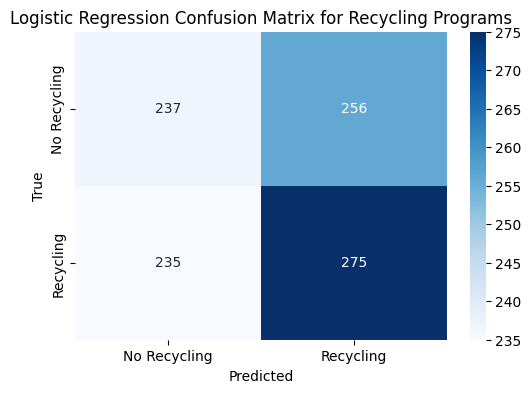

In [11]:
# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Recycling", "Recycling"],
            yticklabels=["No Recycling", "Recycling"])
plt.title("Logistic Regression Confusion Matrix for Recycling Programs")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Logistic Regression Accuracy: 0.5104685942173479
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.48      0.49       493
           1       0.52      0.54      0.53       510

    accuracy                           0.51      1003
   macro avg       0.51      0.51      0.51      1003
weighted avg       0.51      0.51      0.51      1003

Logistic Regression Confusion Matrix:
 [[237 256]
 [235 275]]

Multinomial Naïve Bayes Accuracy: 0.4945164506480558
Multinomial Naïve Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.47      0.48       493
           1       0.50      0.52      0.51       510

    accuracy                           0.49      1003
   macro avg       0.49      0.49      0.49      1003
weighted avg       0.49      0.49      0.49      1003

Multinomial Naïve Bayes Confusion Matrix:
 [[231 262]
 [245 265]]

Decision Tree Accuracy

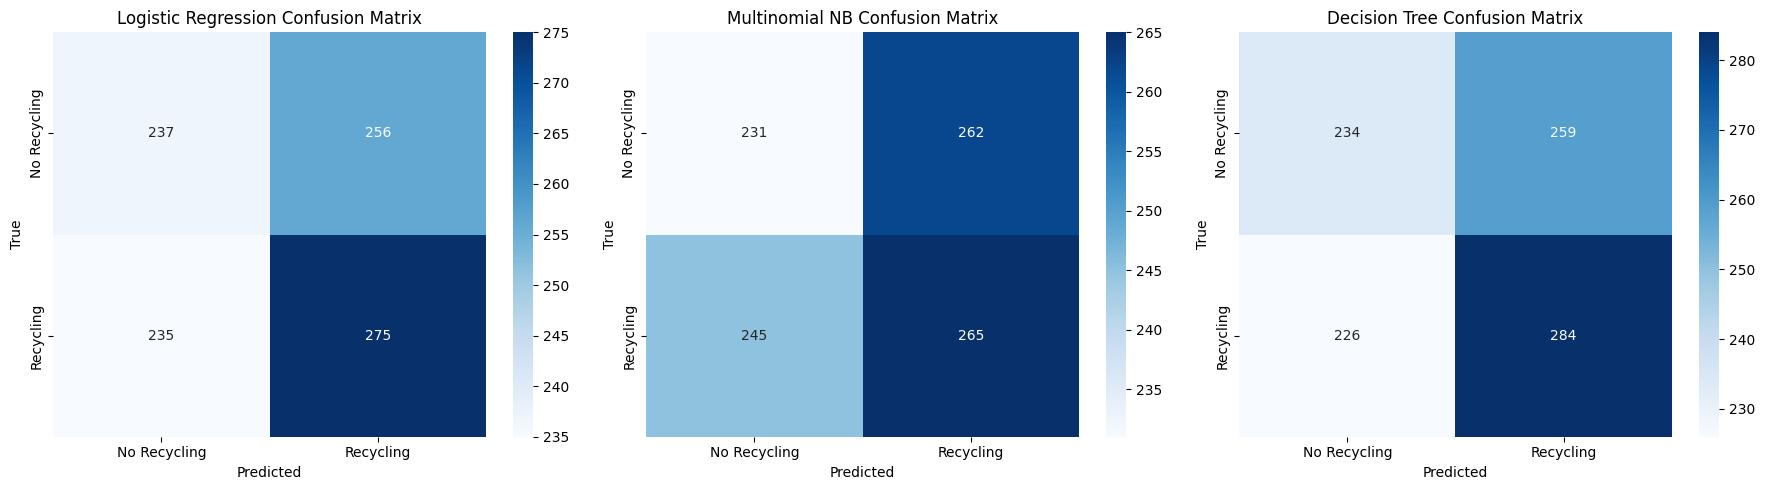

In [14]:


# ---------- Step 2: Define Preprocessing Pipelines ----------

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer

# Preprocessing for Logistic Regression (and Decision Tree): standard scaling for numeric features, one-hot for categoricals.
preprocessor_lr_dt = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Preprocessing for Multinomial NB: discretize numeric features (with KBinsDiscretizer) and one-hot encode categoricals.
numeric_transformer_mnb = Pipeline(steps=[
    ('kbins', KBinsDiscretizer(n_bins=10, encode='onehot', strategy='uniform'))
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor_mnb = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_mnb, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# ---------- Step 3: Build the Three Model Pipelines ----------

# Logistic Regression Pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor_lr_dt),
    ('classifier', LogisticRegression(max_iter=10000, random_state=42))
])
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

# Multinomial Naïve Bayes Pipeline
from sklearn.naive_bayes import MultinomialNB
pipeline_mnb = Pipeline(steps=[
    ('preprocessor', preprocessor_mnb),
    ('classifier', MultinomialNB())
])
pipeline_mnb.fit(X_train, y_train)
y_pred_mnb = pipeline_mnb.predict(X_test)

# Decision Tree Pipeline
from sklearn.tree import DecisionTreeClassifier
# For Decision Trees, scaling is not necessary but we use the same preprocessor for consistency.
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor_lr_dt),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
pipeline_dt.fit(X_train, y_train)
y_pred_dt = pipeline_dt.predict(X_test)

# ---------- Step 4: Evaluate All Models ----------

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression Evaluation
acc_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", acc_lr)
print("Logistic Regression Classification Report:\n", report_lr)
print("Logistic Regression Confusion Matrix:\n", cm_lr)

# Multinomial Naïve Bayes Evaluation
acc_mnb = accuracy_score(y_test, y_pred_mnb)
report_mnb = classification_report(y_test, y_pred_mnb)
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
print("\nMultinomial Naïve Bayes Accuracy:", acc_mnb)
print("Multinomial Naïve Bayes Classification Report:\n", report_mnb)
print("Multinomial Naïve Bayes Confusion Matrix:\n", cm_mnb)

# Decision Tree Evaluation
acc_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\nDecision Tree Accuracy:", acc_dt)
print("Decision Tree Classification Report:\n", report_dt)
print("Decision Tree Confusion Matrix:\n", cm_dt)

# ---------- Step 5: Visualize the Confusion Matrices ----------

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Recycling", "Recycling"],
            yticklabels=["No Recycling", "Recycling"])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1, 3, 2)
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Recycling", "Recycling"],
            yticklabels=["No Recycling", "Recycling"])
plt.title("Multinomial NB Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1, 3, 3)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Recycling", "Recycling"],
            yticklabels=["No Recycling", "Recycling"])
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()
plt.show()


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.510469   0.510138  0.510469  0.510080
1       Multinomial NB  0.494516   0.494219  0.494516  0.494226
2        Decision Tree  0.516451   0.515979  0.516451  0.515656


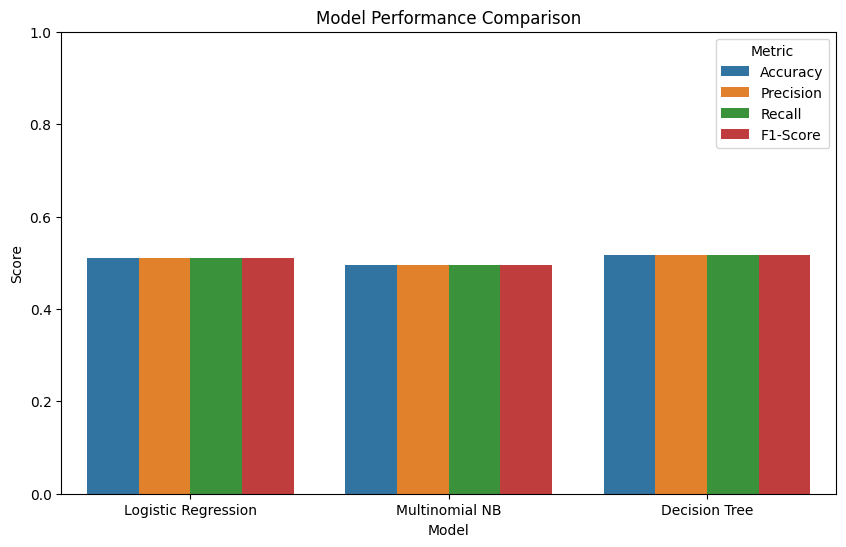

In [15]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

# --- Compute Evaluation Metrics for Each Model ---

# Logistic Regression metrics
acc_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)

# Multinomial Naïve Bayes metrics
acc_mnb = accuracy_score(y_test, y_pred_mnb)
report_mnb = classification_report(y_test, y_pred_mnb, output_dict=True)

# Decision Tree metrics
acc_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)

# --- Create a Summary DataFrame ---
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Multinomial NB', 'Decision Tree'],
    'Accuracy': [acc_lr, acc_mnb, acc_dt],
    'Precision': [
        report_lr['weighted avg']['precision'],
        report_mnb['weighted avg']['precision'],
        report_dt['weighted avg']['precision']
    ],
    'Recall': [
        report_lr['weighted avg']['recall'],
        report_mnb['weighted avg']['recall'],
        report_dt['weighted avg']['recall']
    ],
    'F1-Score': [
        report_lr['weighted avg']['f1-score'],
        report_mnb['weighted avg']['f1-score'],
        report_dt['weighted avg']['f1-score']
    ]
})

print(results)

# --- Visualize the Comparison ---
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape the DataFrame for easier plotting
results_long = results.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_long)
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.show()


Accuracy: 0.5113031914893617


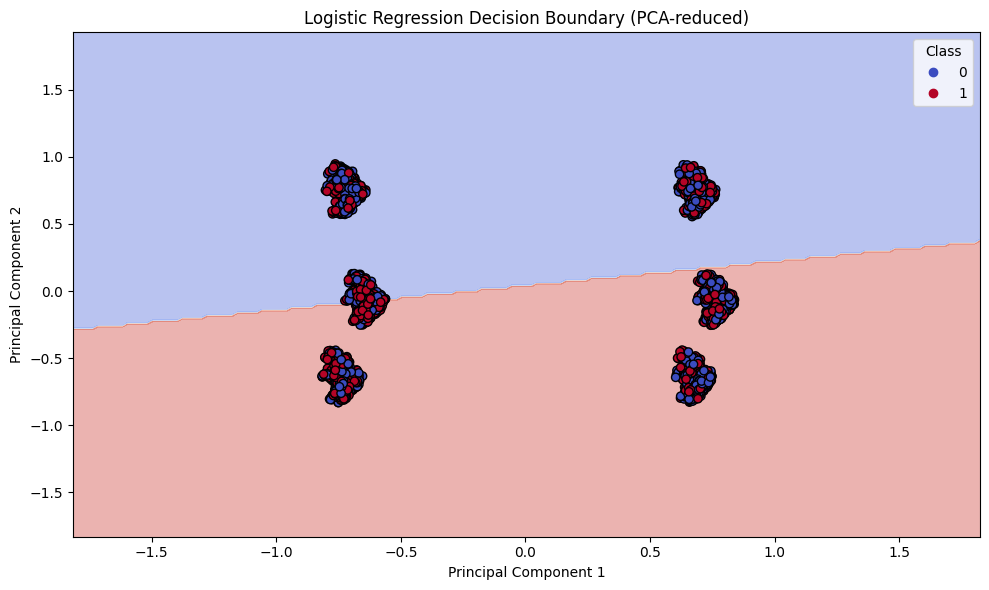

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
df = pd.read_csv("/content/fashion_sustainability_cleaned_final.csv")

# Drop rows with missing target
df = df.dropna(subset=['Eco_Friendly_Manufacturing'])

# Drop non-informative columns
if 'Brand_Name' in df.columns:
    df = df.drop('Brand_Name', axis=1)

# Features and target
features = ['Country', 'Sustainability_Rating', 'Material_Type',
            'Recycling_Programs', 'Product_Lines', 'Market_Trend', 'Certifications']
X = df[features]
y = df['Eco_Friendly_Manufacturing']

# Encode target if not numeric
if y.dtype == 'object' or y.dtype.name == 'category':
    y = LabelEncoder().fit_transform(y)

# One-hot encode features
encoder = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), features)],
    remainder='drop'
)
X_encoded = encoder.fit_transform(X)

# Ensure dense float array
X_encoded = X_encoded.astype(float).toarray() if hasattr(X_encoded, 'toarray') else X_encoded

# PCA to 2D
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate
print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))

# Plot decision boundaries
h = 0.02
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title("Logistic Regression Decision Boundary (PCA-reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(*scatter.legend_elements(), title="Class")
plt.tight_layout()
plt.show()